In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

In [2]:
# sage, srgnn 중 선택
embed_model = 'srgnn'

filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}

In [3]:
data_path = "../data/"
embedding = np.load(os.path.join(data_path, filename[embed_model])) # 불러올 임베딩 파일 이름
view_hist = pd.read_pickle(os.path.join(data_path,'sid_6to6.pkl')) # 불러올 시청 이력 파일
name_file = pickle.load(open(os.path.join(data_path,'3com_prg_dict.pkl'), 'rb'))
k = 15                #여기서 클러스터 개수 정하기

In [4]:
view_hist

,MAC,start_time,end_time,stay_time,interval_time,ptitle,ptitle_prep,genre1,genre2,grade,ch_name,sid_6to6
0,0,1661748353,1661748451,98,0.0,channelollehtv,channelollehtv,NaN,NaN,NaN,channelollehtv,0_0
1,0,1661748458,1661748542,84,7.0,sbs,sbs,NaN,NaN,NaN,sbs,0_0
2,0,1661748542,1661785199,36657,0.0,롯데홈쇼핑,롯데홈쇼핑,NaN,NaN,NaN,롯데홈쇼핑,0_0
3,0,1661853365,1661869575,16210,68166.0,롯데홈쇼핑,롯데홈쇼핑,NaN,NaN,NaN,롯데홈쇼핑,0_1
4,0,1661911317,1661971739,60422,41742.0,channelollehtv,channelollehtv,NaN,NaN,NaN,channelollehtv,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...
31782286,4846,1667220300,1667220469,169,0.0,이데베논 앰플 시즌3,홈쇼핑_뷰티,L0,L007,0.0,롯데홈쇼핑,4846_152
31782290,4846,1667220484,1667220694,210,1.0,토트넘 이지웨어,홈쇼핑_건강,L0,L004,0.0,skstoa02,4846_152
31782293,4846,1667220700,1667221093,393,0.0,[특집]TV CHOSUN 뉴스9,뉴스_일반,I0,I007,0.0,tv조선,4846_152
31782294,4846,1667221093,1667221200,107,0.0,특집 KBS 뉴스 9,뉴스_뉴스,I0,I001,0.0,kbs1,4846_152


In [7]:
embedding.shape

(4847, 128)

In [4]:
x = np.where(np.sum(embedding, axis=1)==0)
x = x[0]
view_hist.MAC = view_hist.MAC.astype(int)
view_hist = view_hist[~view_hist['MAC'].isin(x)]

In [5]:
genre_dic_path = '../data/epg_genre.xls'
genre_dic_df = pd.read_excel(genre_dic_path)
genre_dic_df['소장르명1'] = genre_dic_df['소장르(genre2)'] + '(' + genre_dic_df['대장르명'].str.replace(' ', '') + '_' + genre_dic_df['소장르명'].str.replace(' ', '') + ')'

In [6]:
# 중장르 매핑 딕셔너리 만들기
genre2_df = genre_dic_df.iloc[:,[2, 4]] # 모든행, [2, 4]번째 컬럼 즉 중장르, 중장르명 뽑고
genre2_dict = {}
for idx, (genre2_code, name) in genre2_df.iterrows(): # 인덱스번호, (중장르값, 중장르명값)
    genre2_dict[genre2_code] = name # key: 중장르, value: 중장르명

In [7]:
# 매핑 함수
def change(x):
    try:
        return genre2_dict[x]
    except:
        return x
    
view_hist['genre2'] = view_hist['genre2'].map(lambda x: change(x))
view_hist

,MAC,start_time,end_time,stay_time,interval_time,ptitle,ptitle_prep,genre1,genre2,grade,ch_name,sid_6to6
0,0,1661748353,1661748451,98,0.0,channelollehtv,channelollehtv,NaN,NaN,NaN,channelollehtv,0_0
1,0,1661748458,1661748542,84,7.0,sbs,sbs,NaN,NaN,NaN,sbs,0_0
2,0,1661748542,1661785199,36657,0.0,롯데홈쇼핑,롯데홈쇼핑,NaN,NaN,NaN,롯데홈쇼핑,0_0
3,0,1661853365,1661869575,16210,68166.0,롯데홈쇼핑,롯데홈쇼핑,NaN,NaN,NaN,롯데홈쇼핑,0_1
4,0,1661911317,1661971739,60422,41742.0,channelollehtv,channelollehtv,NaN,NaN,NaN,channelollehtv,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...
31782286,4846,1667220300,1667220469,169,0.0,이데베논 앰플 시즌3,홈쇼핑_뷰티,L0,L007(홈쇼핑_뷰티),0.0,롯데홈쇼핑,4846_152
31782290,4846,1667220484,1667220694,210,1.0,토트넘 이지웨어,홈쇼핑_건강,L0,L004(홈쇼핑_건강/레포츠),0.0,skstoa02,4846_152
31782293,4846,1667220700,1667221093,393,0.0,[특집]TV CHOSUN 뉴스9,뉴스_일반,I0,I007(뉴스_일반),0.0,tv조선,4846_152
31782294,4846,1667221093,1667221200,107,0.0,특집 KBS 뉴스 9,뉴스_뉴스,I0,I001(뉴스_뉴스),0.0,kbs1,4846_152


In [8]:
df = view_hist.copy()
df

,MAC,start_time,end_time,stay_time,interval_time,ptitle,ptitle_prep,genre1,genre2,grade,ch_name,sid_6to6
0,0,1661748353,1661748451,98,0.0,channelollehtv,channelollehtv,NaN,NaN,NaN,channelollehtv,0_0
1,0,1661748458,1661748542,84,7.0,sbs,sbs,NaN,NaN,NaN,sbs,0_0
2,0,1661748542,1661785199,36657,0.0,롯데홈쇼핑,롯데홈쇼핑,NaN,NaN,NaN,롯데홈쇼핑,0_0
3,0,1661853365,1661869575,16210,68166.0,롯데홈쇼핑,롯데홈쇼핑,NaN,NaN,NaN,롯데홈쇼핑,0_1
4,0,1661911317,1661971739,60422,41742.0,channelollehtv,channelollehtv,NaN,NaN,NaN,channelollehtv,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...
31782286,4846,1667220300,1667220469,169,0.0,이데베논 앰플 시즌3,홈쇼핑_뷰티,L0,L007(홈쇼핑_뷰티),0.0,롯데홈쇼핑,4846_152
31782290,4846,1667220484,1667220694,210,1.0,토트넘 이지웨어,홈쇼핑_건강,L0,L004(홈쇼핑_건강/레포츠),0.0,skstoa02,4846_152
31782293,4846,1667220700,1667221093,393,0.0,[특집]TV CHOSUN 뉴스9,뉴스_일반,I0,I007(뉴스_일반),0.0,tv조선,4846_152
31782294,4846,1667221093,1667221200,107,0.0,특집 KBS 뉴스 9,뉴스_뉴스,I0,I001(뉴스_뉴스),0.0,kbs1,4846_152


In [9]:
df = df.dropna(axis=0)

In [ ]:
# stay_time 초 단위에서 분 단위로 바꾸기
df['stay_time'] = df['stay_time'].apply(lambda x: round(x/60, 1))
df.head()

,MAC,start_time,end_time,stay_time,interval_time,ptitle,ptitle_prep,genre1,genre2,grade,ch_name,sid_6to6
16,0,1662200662,1662201300,10.6,18.0,배우는 캠핑짱,배우는캠핑짱,D0,D020(연예/오락_일반),15.0,ena,0_5
17,0,1662201300,1662202166,14.4,0.0,오늘의 웹툰,오늘의웹툰,A0,A021(드라마_트렌디),15.0,ena,0_5
19,0,1662202185,1662202388,3.4,1.0,오늘의 웹툰,오늘의웹툰,A0,A021(드라마_트렌디),15.0,ena,0_5
20,0,1662202424,1662202579,2.6,36.0,상상자극,취미,F0,F009(취미/레저_애완동물),0.0,dogtv,0_5
21,0,1662202580,1662205800,53.7,1.0,히든싱어7,히든싱어7,D0,D020(연예/오락_일반),15.0,jtbc,0_5


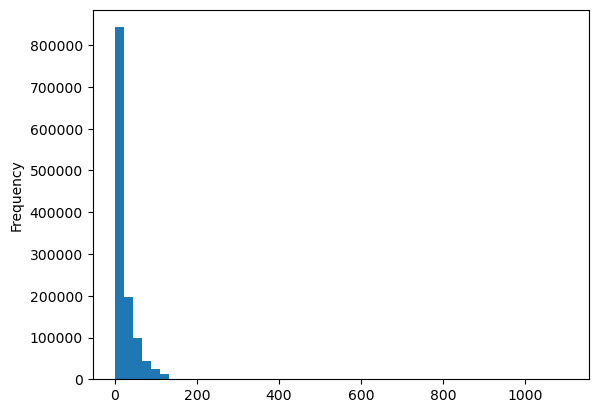

In [11]:
for genre in df['genre2'].unique():
    news_df = df[df['genre2'] == genre]
    news_df.stay_time.plot.hist(bins=50)
    plt.show()

In [12]:
# prog_aud
# 평균 표준편차 구하기
genre2_mean = df.groupby('genre2')['stay_time'].mean()
genre2_std = df.groupby('genre2')['stay_time'].std()

# merge를 위한 column 이름 바꾸기
genre2_mean.name = 'mean'
genre2_std.name = 'std'

# mean merge
merged_df = pd.merge(df, genre2_mean, on='genre2', how='left')

# std merge
merged_df = pd.merge(merged_df, genre2_std, on='genre2', how='left')

# stay_time이 이상치인 경우 3_sigma로 대체
merged_df['3_sigma'] = merged_df['mean'] + 3*merged_df['std']
merged_df['stay_time'] = merged_df.apply(lambda x: x['3_sigma'] if x['stay_time'] > x['3_sigma'] else x['stay_time'], axis=1)

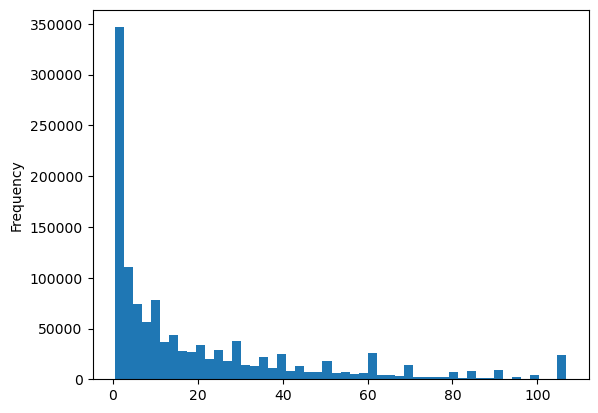

In [13]:
out_news_df = merged_df[merged_df['genre2'] == 'I001(뉴스_뉴스)']
out_news_df.stay_time.plot.hist(bins=50)
plt.show()

In [14]:
# 이상치 대체한 최종 데이터프레임
final_df = merged_df[['MAC', 'genre2', 'stay_time']]
final_df

,MAC,genre2,stay_time
0,0,D020(연예/오락_일반),10.6
1,0,A021(드라마_트렌디),14.4
2,0,A021(드라마_트렌디),3.4
3,0,F009(취미/레저_애완동물),2.6
4,0,D020(연예/오락_일반),53.7
...,...,...,...
10009476,4846,L007(홈쇼핑_뷰티),2.8
10009477,4846,L004(홈쇼핑_건강/레포츠),3.5
10009478,4846,I007(뉴스_일반),6.5
10009479,4846,I001(뉴스_뉴스),1.8


In [15]:
drop_df = final_df[~final_df.genre2.isna()]
drop_df

,MAC,genre2,stay_time
0,0,D020(연예/오락_일반),10.6
1,0,A021(드라마_트렌디),14.4
2,0,A021(드라마_트렌디),3.4
3,0,F009(취미/레저_애완동물),2.6
4,0,D020(연예/오락_일반),53.7
...,...,...,...
10009476,4846,L007(홈쇼핑_뷰티),2.8
10009477,4846,L004(홈쇼핑_건강/레포츠),3.5
10009478,4846,I007(뉴스_일반),6.5
10009479,4846,I001(뉴스_뉴스),1.8


In [16]:
pivot_df = pd.pivot_table(drop_df, index='MAC', columns='genre2', values='stay_time', aggfunc='sum', fill_value=0)
pivot_df

genre2,A001(드라마_공포),A002(드라마_논픽션),A003(드라마_농어촌),A004(드라마_단막극/단편),A006(드라마_로맨틱코메디),A007(드라마_멜로),A008(드라마_모험),A010(드라마_미스터리/스릴러),A012(드라마_시대극),A013(드라마_시트콤),...,L011(홈쇼핑_자동차용품),L012(홈쇼핑_종합),L013(홈쇼핑_침구),L014(홈쇼핑_컴퓨터/사무기기),L015(홈쇼핑_패션/의류),L016(홈쇼핑_기타),L021,L022,L023,L024
MAC,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,262.000000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.3,0.7,108.6,58.100000,0.0,19.100000,63.5,0.0,...,0.0,28.10000,11.5,0.0,66.100000,258.6,0.0,0.0,3.1,0.0
2,0.0,0.0,0.0,0.0,2392.8,684.900000,0.0,3216.800000,577.0,0.0,...,0.0,0.00000,0.7,0.0,48.800000,1.1,0.0,0.0,14.3,0.0
3,0.0,0.0,1.4,0.0,25.6,53.100000,0.0,139.500000,0.0,3.8,...,0.0,0.00000,0.0,0.0,2.900000,36.7,0.0,0.0,0.0,0.0
4,23.0,0.0,1.0,1388.3,1641.5,1344.000000,0.0,3494.512219,398.8,137.8,...,0.0,404.70000,35.0,0.0,1336.473074,1182.3,0.0,25.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,0.0,0.0,0.0,0.0,470.5,151.000000,0.0,991.300000,218.2,0.0,...,0.0,0.00000,0.0,0.0,19.100000,3.5,0.0,0.0,17.4,0.0
4843,29.6,0.0,10.6,268.2,1011.2,3678.030870,0.0,827.500000,1000.8,0.0,...,0.0,1.20000,0.9,0.0,23.300000,0.5,0.0,0.0,5.2,0.0
4844,0.0,0.0,0.0,0.0,0.0,0.600000,0.0,0.000000,1.6,7.7,...,0.0,0.00000,0.0,0.0,2.600000,0.0,0.0,0.0,0.0,0.0


In [17]:
pivot_df.to_csv(os.path.join(data_path,'pivot_genre2_data.csv'))

In [18]:
pd.read_csv(os.path.join(data_path,'pivot_genre2_data.csv'), index_col=0)

,A001(드라마_공포),A002(드라마_논픽션),A003(드라마_농어촌),A004(드라마_단막극/단편),A006(드라마_로맨틱코메디),A007(드라마_멜로),A008(드라마_모험),A010(드라마_미스터리/스릴러),A012(드라마_시대극),A013(드라마_시트콤),...,L011(홈쇼핑_자동차용품),L012(홈쇼핑_종합),L013(홈쇼핑_침구),L014(홈쇼핑_컴퓨터/사무기기),L015(홈쇼핑_패션/의류),L016(홈쇼핑_기타),L021,L022,L023,L024
MAC,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,262.000000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.3,0.7,108.6,58.100000,0.0,19.100000,63.5,0.0,...,0.0,28.10000,11.5,0.0,66.100000,258.6,0.0,0.0,3.1,0.0
2,0.0,0.0,0.0,0.0,2392.8,684.900000,0.0,3216.800000,577.0,0.0,...,0.0,0.00000,0.7,0.0,48.800000,1.1,0.0,0.0,14.3,0.0
3,0.0,0.0,1.4,0.0,25.6,53.100000,0.0,139.500000,0.0,3.8,...,0.0,0.00000,0.0,0.0,2.900000,36.7,0.0,0.0,0.0,0.0
4,23.0,0.0,1.0,1388.3,1641.5,1344.000000,0.0,3494.512219,398.8,137.8,...,0.0,404.70000,35.0,0.0,1336.473074,1182.3,0.0,25.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,0.0,0.0,0.0,0.0,470.5,151.000000,0.0,991.300000,218.2,0.0,...,0.0,0.00000,0.0,0.0,19.100000,3.5,0.0,0.0,17.4,0.0
4843,29.6,0.0,10.6,268.2,1011.2,3678.030870,0.0,827.500000,1000.8,0.0,...,0.0,1.20000,0.9,0.0,23.300000,0.5,0.0,0.0,5.2,0.0
4844,0.0,0.0,0.0,0.0,0.0,0.600000,0.0,0.000000,1.6,7.7,...,0.0,0.00000,0.0,0.0,2.600000,0.0,0.0,0.0,0.0,0.0
